In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model import *
from utils import *
from config import *


In [2]:
train_loader, _,_ = create_dataloaders(
        npz_path="datasets/seq/seq_train.npz",
        batch_size=16,
        val_ratio=0,
        test_ratio=0
    )
val_loader, test_loader,_ = create_dataloaders(
        npz_path="datasets/seq/seq_validation.npz",
        batch_size=16,
        val_ratio=0.3,
        test_ratio=0
    )

train_loader,val_loader, test_loader= create_dataloaders(
        npz_path="datasets/seq/seq_gesture.npz",
        batch_size=16,
        val_ratio=0.3,
        test_ratio=0.1
    )

Dataset loaded. Total samples: 1186
Feature shape: (1186, 13, 99), Number of label classes: 5

Dataset split:
Training set: 1186 samples
Validation set: 0 samples
Test set: 0 samples
Dataset loaded. Total samples: 582
Feature shape: (582, 13, 99), Number of label classes: 5

Dataset split:
Training set: 408 samples
Validation set: 174 samples
Test set: 0 samples
Dataset loaded. Total samples: 1734
Feature shape: (1734, 13, 99), Number of label classes: 5

Dataset split:
Training set: 1041 samples
Validation set: 520 samples
Test set: 173 samples


In [3]:
# 3. 初始化模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMClassifier(input_size=99, hidden_size=64, num_layers=2, num_classes=5).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [4]:
history = train(model, train_loader, val_loader, criterion, optimizer, device, epochs=50)


Epoch 1/50: Train Loss: 1.2534, Train Acc: 0.5351 | Val Loss: 0.9512, Val Acc: 0.6077
Epoch 2/50: Train Loss: 0.5880, Train Acc: 0.8146 | Val Loss: 0.5130, Val Acc: 0.8250
Epoch 3/50: Train Loss: 0.3244, Train Acc: 0.8934 | Val Loss: 0.2834, Val Acc: 0.9096
Epoch 4/50: Train Loss: 0.2185, Train Acc: 0.9337 | Val Loss: 0.2345, Val Acc: 0.9231
Epoch 5/50: Train Loss: 0.1400, Train Acc: 0.9597 | Val Loss: 0.2167, Val Acc: 0.9462
Epoch 6/50: Train Loss: 0.1382, Train Acc: 0.9529 | Val Loss: 0.3641, Val Acc: 0.8923
Epoch 7/50: Train Loss: 0.0713, Train Acc: 0.9846 | Val Loss: 0.1073, Val Acc: 0.9750
Epoch 8/50: Train Loss: 0.0602, Train Acc: 0.9827 | Val Loss: 0.2057, Val Acc: 0.9365
Epoch 9/50: Train Loss: 0.0340, Train Acc: 0.9875 | Val Loss: 0.0572, Val Acc: 0.9846
Epoch 10/50: Train Loss: 0.0293, Train Acc: 0.9904 | Val Loss: 0.0720, Val Acc: 0.9769
Epoch 11/50: Train Loss: 0.0688, Train Acc: 0.9769 | Val Loss: 0.1196, Val Acc: 0.9692
Epoch 12/50: Train Loss: 0.0880, Train Acc: 0.9712 |

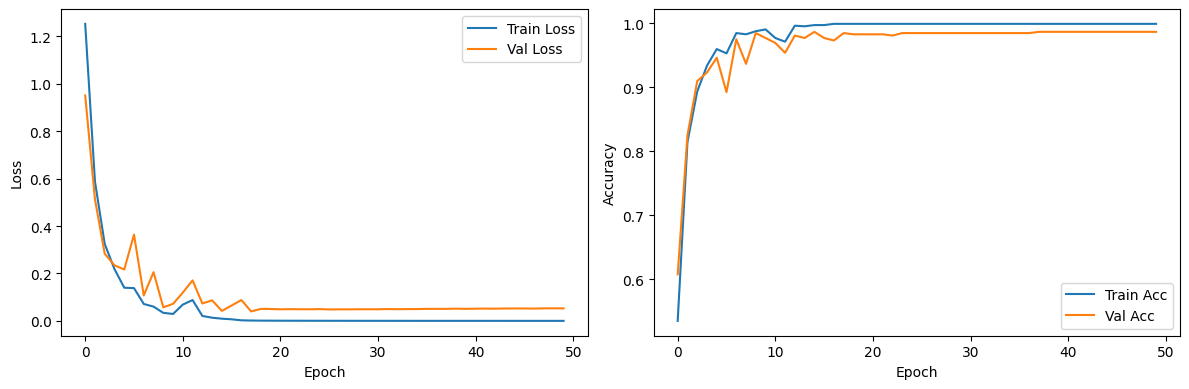

train history saved to output/history.png


<Figure size 640x480 with 0 Axes>

In [5]:
 # 5. 可视化训练曲线
plot_history(history,save_path='output/history.png')

In [6]:
test_result = evaluate(model, val_loader,criterion, device)
test_true ,test_pred = test_result['y_true'],test_result['y_pred']
class_names =ACTIONS

Confusion matrix saved to output/confusion_matrix_raw_13.png


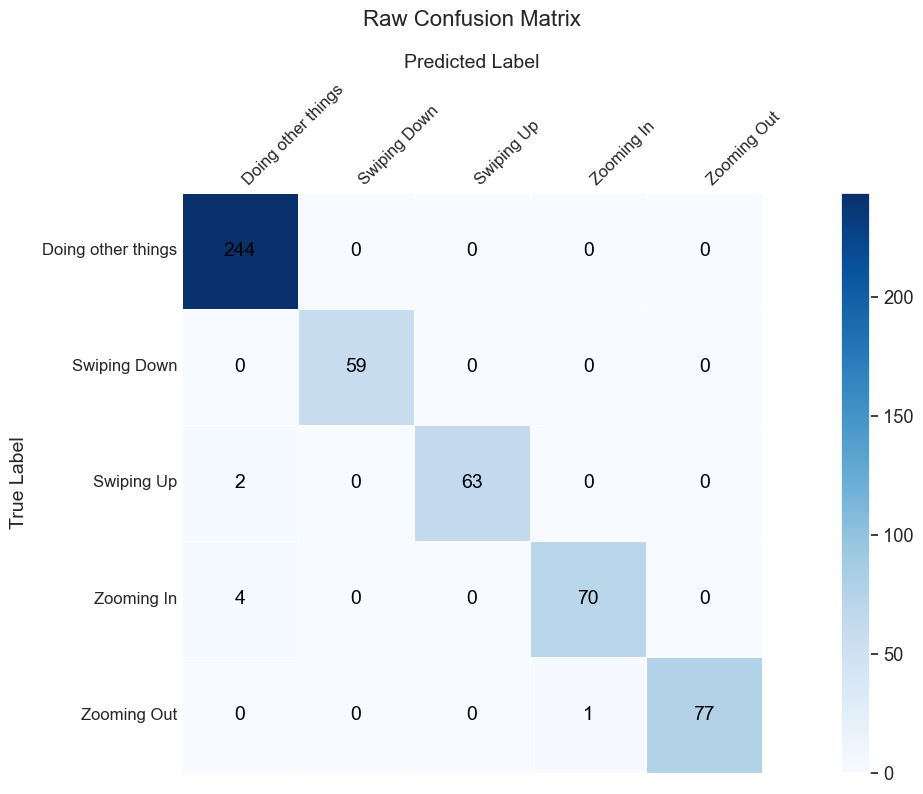

In [7]:

plot_confusion_matrix(test_true, test_pred, 
                     classes=class_names,
                     title='Raw Confusion Matrix',
                     save_path='output/confusion_matrix_raw_13.png')



Confusion matrix saved to output/confusion_matrix_norm_13.png


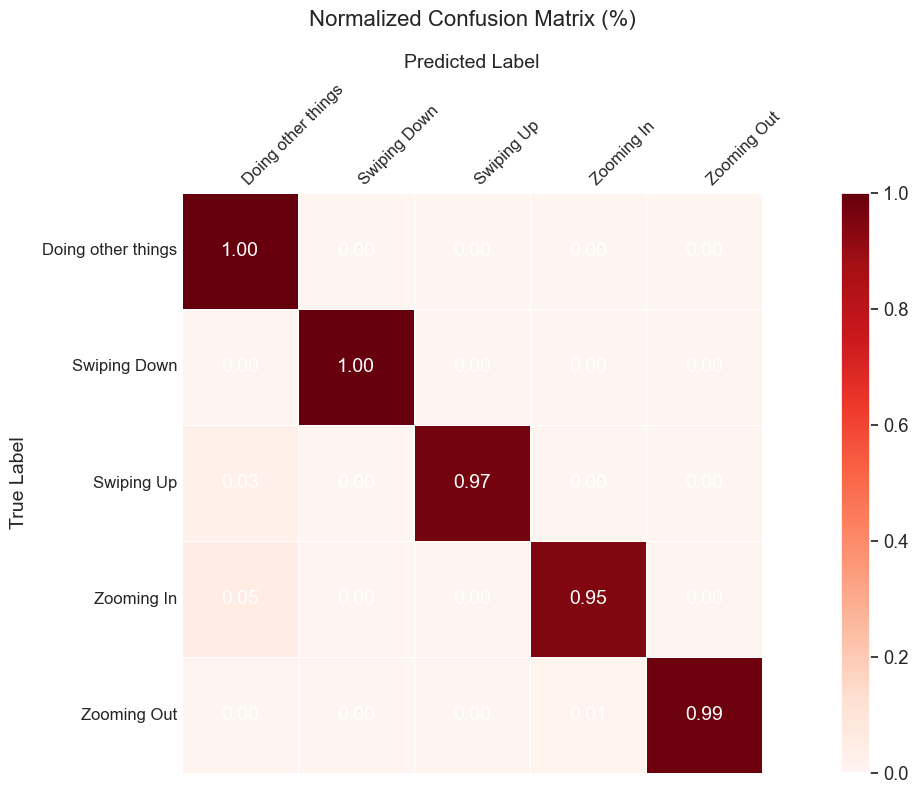

In [8]:
# 2. 归一化百分比矩阵
plot_confusion_matrix(test_true, test_pred, 
                     classes=class_names, normalize=True,
                     title='Normalized Confusion Matrix (%)',
                     cmap=plt.cm.Reds,
                     save_path='output/confusion_matrix_norm_13.png')

In [9]:
torch.save({
    'model_state_dict': model.state_dict(),
    'history': history
}, 'model/lstm_model.pth')